In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=100, n_features=10, n_informative=6, n_redundant=4, n_classes=2, random_state=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Confusion Matrix
Матрица типовых ошибок:\
$TN$ - True Negative - The predict value is negative and the true value is negative\
$FP$ - False Positive - The predict value is positive but the true value is negative\
$FN$ - False Negative - The predict value is negative but the true value is positive\
$TP$ - True Positive - The predict value is positive and the true value is positive

$
\begin{bmatrix}
TN & FP \\
FN & TP\\
\end{bmatrix}
$

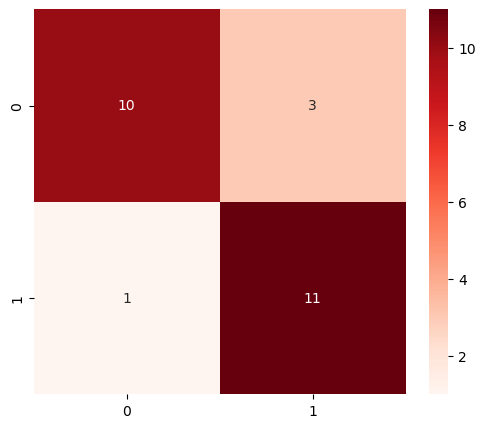

In [5]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Reds');

In [6]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
TN, FP, FN, TP

(10, 3, 1, 11)

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score

## Accuracy
Точность - Доля правильных предсказаний к общей сумме предсказаний.\
- Не учитывает дисбаланс классов: Если один класс значительно преобладает над другим, то модель может быть смещена в его сторону, и тогда высокая точность не будет отражать истинное качество модели
- Не дает информацию о типе ошибок
$$
Accuracy = \frac{1}{N}\sum_{i=1}^N [y_i = \hat{y_i}] = \frac{Number\ of\ Correct\ Predictions}{Number\ of\ Total\ Predictions} = \frac{TP+TN}{TP+TN+FP+FN}
$$

In [18]:
display(
    accuracy_score(y_test, y_pred),
    (TP+TN)/(TP+TN+FP+FN)
       )

0.84

0.84

## Precision & Recall
**Precision** - Отражает долю правильно предсказанных положительных классов ко всем положительным предсказаниям. \
*Точность правильных срабатываний*
$$
Precision = \frac{TP}{TP+FP}
$$

**Recall** - Отражает долю правильно предсказанных положительных классов ко всем объектам реально относящихся к положительному классу. \
*Полнота правильных срабатываний*
$$
Recall = TPR = \frac{TP}{TP+FN}
$$

In [23]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision, recall

(0.7857142857142857, 0.9166666666666666)

# F1-score
Гармоническое среднее между **Precision** и **Recall**, обеспечивающая баланс между ними. Отражает насколько хорошо модель распознает положительный класс из всех объектов положительного класса и какая доля из тех, кого алгоритм назвал положительным классом, действительно являются положительным классом.

В балансе **F1-score** - **Precision** и **Recall** имеют одинаковую важность.
$$
\text{F1-score} = 2*\frac{Precison * Recall}{Precision+Recall} = 2*(\frac{1}{precision}+\frac{1}{recall})
$$


# F$\beta$-score
Скорректированный F1-score, позваляет парамтром $\beta$ придать больший приоритет одной из метрик **precision** и **recall** исходя из задачи.\
$\beta=1$ Соответствуюет F1-score, одинакова важны.\
$\beta>1$ Приоритет Recall\
$\beta<1$ Приоритет Precision
$$
\text{F$\beta$-score} = (1+\beta^2)*\frac{Precison * Recall}{\beta^2*Precision+Recall}
$$

In [31]:
f1_score(y_test, y_pred)

0.8461538461538461

In [29]:
2/(1/precision + 1/recall )

0.8461538461538461

In [33]:
2*(precision*recall)/(precision+recall)

0.8461538461538461

In [38]:
fbeta_score(y_test, y_pred, beta=1)

0.8461538461538461

In [41]:
fbeta_score(y_test, y_pred, beta=0.5)

0.8088235294117647

# ROC-AUC
Оценка качества модели при разных пороговых значениях разделения классов, используется AUC-площадь(Area Under Curve) под ROC-кривой(Receiver Operating Characteristics curve)\
Это график зависимости True Positive Rate (чувствительность) от False Positive Rate (ложные срабатывания) при разных порогах классификации.
$$
TPR = \frac{TP}{TP+FN} \hspace{3cm} FPR = \frac{FP}{FP+TN}
$$
$TPR$ - True Positive Rate - Полнота правильных срабатываний\
Сколько образцов модель отнесла к целевому классу среди всех образцов реально относящихся к целевому классу)\
$FPR$ - False Positive Rate - Полнота ошибочного срабатывания\
Сколько образцов модель ошибочно отнесла к целевому классу среди всех образцов не относящихся к целевому классу
$$
AUC = \sum_{i=1}^{n-1} \frac{TPR_i+TPR_{i+1}}{2} (FPR_{i+1}-FPR_i)
$$

`roc_auc_score` - Площадь под кривой, чем ближе к 1 тем лучше модель, разделяет классы.

In [54]:
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

In [115]:
y_pred_proba = model.predict_proba(X_test)[:,1] # 1 - Целевой класс

In [125]:
fpr, tpr, thresholds  = roc_curve(y_test, y_pred_proba)

In [140]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
roc_auc

0.9423076923076923

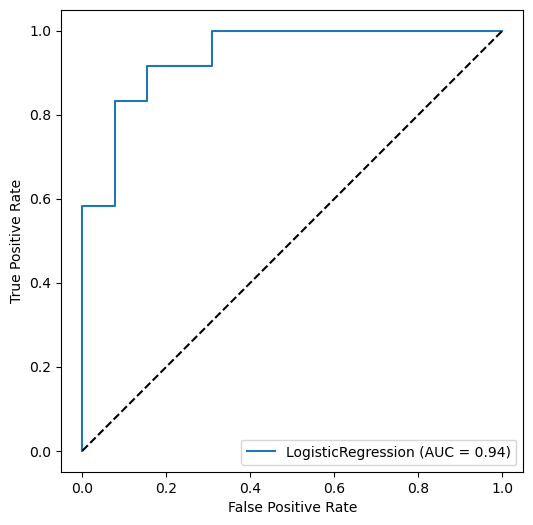

In [197]:
fig, ax = plt.subplots(figsize=(8,6))
ROC_AUC = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='LogisticRegression')
ROC_AUC.plot(ax=ax)
ax.set_xlim([-0.05, 1.05])
ax.set_ylim([-0.05, 1.05]) 
ax.plot([0, 1], [0, 1], color='k', linestyle='--', label='Chance level');

## Youden’s J-statistic
Порог при котором $J$ максимален считается оптимальным.
$J = TPR - FPR$

In [198]:
j_score = tpr - fpr
best_idx = np.argmax(j_score)
best_threshold = thresholds[best_idx]

best_threshold

0.6412188302291758

In [158]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5)

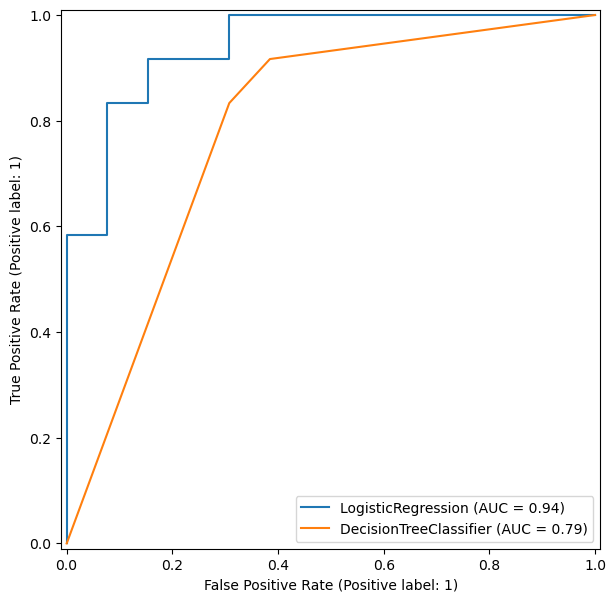

In [164]:
# Из вероятностей
fig, ax = plt.subplots(figsize=(10, 7))
RocCurveDisplay.from_predictions(y_test, y_pred_proba, name='LogisticRegression', ax=ax)
# Из эстиматора
RocCurveDisplay.from_estimator(tree, X_test, y_test, ax=ax);